<a href="https://colab.research.google.com/github/varshini03/insider-threat-detection-framework/blob/main/cert_itd_final_feature_extarction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 111.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from datetime import datetime, time
from tensorflow import keras
import tensorflow as tf

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
logon_data = pd.read_csv('/content/logon.csv')
device_data = pd.read_csv('/content/device.csv')
file_data = pd.read_csv('/content/file.csv')
email_data = pd.read_csv('/content/email.csv')

In [ ]:
logon_data.columns

Index(['id', 'date', 'user', 'pc', 'activity'], dtype='object')

In [ ]:
email_data.columns

Index(['id', 'date', 'user', 'pc', 'to', 'cc', 'bcc', 'from', 'size',
       'attachments', 'content'],
      dtype='object')

In [ ]:
device_data.columns

Index(['id', 'date', 'user', 'pc', 'activity'], dtype='object')

In [ ]:
file_data.columns

Index(['id', 'date', 'user', 'pc', 'filename', 'content'], dtype='object')

In [ ]:
email_data

,id,date,user,pc,to,cc,bcc,from,size,attachments,content
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...
...,...,...,...,...,...,...,...,...,...,...,...
2629974,{L7U1-S3KK01XW-3123TPUC},05/16/2011 20:54:18,HRL0540,PC-1117,Hadley.Willa.Hill@dtaa.com;Tarik.Linus.Hubbard...,Hedwig.Regina.Livingston@dtaa.com,NaN,Hedwig.Regina.Livingston@dtaa.com,33088,0,history designed stephen degree ignore them ad...
2629975,{Q4Y3-X9HV77CL-3290SOZH},05/16/2011 20:54:43,LAF0991,PC-4973,Hu.Akeem.Vincent@dtaa.com,Brianna.Rebecca.Mcintyre@dtaa.com;Kermit.Coby....,NaN,Lucas.Ahmed.Ferrell@dtaa.com,33249,1,prince prince ahmose ahmose ankh prince prince...
2629976,{L6B7-F7RU89CD-0355JGGE},05/16/2011 21:08:12,LAF0991,PC-4973,Doyle.Grant@netzero.com;HAV856@charter.net,NaN,NaN,Ferrell.Lucas@sbcglobal.net,41336,1,lifted documents 65 declined revival 14 unprec...
2629977,{F4R9-W0OQ41HB-0157JSUE},05/16/2011 21:15:35,JMW0638,PC-1397,Eagan.Zephania.Talley@dtaa.com,NaN,NaN,Jonah.Merritt.Wilder@dtaa.com,39908,0,their official holmes face arranged among priz...


In [ ]:
logon_data

,id,date,user,pc,activity
0,{X1D9-S0ES98JV-5357PWMI},01/02/2010 06:49:00,NGF0157,PC-6056,Logon
1,{G2B3-L6EJ61GT-2222RKSO},01/02/2010 06:50:00,LRR0148,PC-4275,Logon
2,{U6Q3-U0WE70UA-3770UREL},01/02/2010 06:53:04,LRR0148,PC-4124,Logon
3,{I0N5-R7NA26TG-6263KNGM},01/02/2010 07:00:00,IRM0931,PC-7188,Logon
4,{D1S0-N6FH62BT-5398KANK},01/02/2010 07:00:00,MOH0273,PC-6699,Logon
...,...,...,...,...,...
854854,{J8R2-H0FA17MQ-9304VEVQ},05/17/2011 04:40:33,JDF0593,PC-6301,Logoff
854855,{P3L5-A2AC53JU-4012GIRD},05/17/2011 05:21:58,MLM0950,PC-9787,Logoff
854856,{P2S0-P1JS62IF-2767BEPH},05/17/2011 05:25:33,IRM0931,PC-7188,Logon
854857,{Z2U6-I8MA03NC-4963HKBH},05/17/2011 06:23:48,IRM0931,PC-7188,Logoff


In [ ]:
file_data

,id,date,user,pc,filename,content
0,{L9G8-J9QE34VM-2834VDPB},01/02/2010 07:23:14,MOH0273,PC-6699,EYPC9Y08.doc,D0-CF-11-E0-A1-B1-1A-E1 during difficulty over...
1,{H0W6-L4FG38XG-9897XTEN},01/02/2010 07:26:19,MOH0273,PC-6699,N3LTSU3O.pdf,25-50-44-46-2D carpenters 25 landed strait dis...
2,{M3Z0-O2KK89OX-5716MBIM},01/02/2010 08:12:03,HPH0075,PC-2417,D3D3WC9W.doc,D0-CF-11-E0-A1-B1-1A-E1 union 24 declined impo...
3,{E1I4-S4QS61TG-3652YHKR},01/02/2010 08:17:00,HPH0075,PC-2417,QCSW62YS.doc,D0-CF-11-E0-A1-B1-1A-E1 becoming period begin ...
4,{D4R7-E7JL45UX-0067XALT},01/02/2010 08:24:57,HSB0196,PC-8001,AU75JV6U.jpg,FF-D8
...,...,...,...,...,...,...
445576,{J2Q8-Z4UX02QT-2675RTJI},05/16/2011 23:22:31,IBB0359,PC-3620,R8DTDN2Q.txt,5A-44-4F-39 government operations led wound co...
445577,{S3G4-K5PB37EL-4663ADOI},05/16/2011 23:22:32,IBB0359,PC-3620,BLHCRL6W.pdf,25-50-44-46-2D throughout 20 once armed southe...
445578,{G6G8-X7JK94JA-2703OXCY},05/16/2011 23:22:33,IBB0359,PC-3620,ZHMDTTW0.doc,D0-CF-11-E0-A1-B1-1A-E1 companies river englan...
445579,{H8U9-F5GM78QB-9540DSQM},05/16/2011 23:22:33,IBB0359,PC-3620,AC0QL6KF.pdf,25-50-44-46-2D member august observed selected...


In [ ]:
device_data

,id,date,user,pc,activity
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect
...,...,...,...,...,...
405375,{R7R7-Y9VH64MN-4427OTOU},05/16/2011 22:27:23,EIS0041,PC-0422,Disconnect
405376,{J1G6-G7KE64TX-7505AXXN},05/16/2011 22:43:49,IBB0359,PC-4176,Connect
405377,{I3V8-Q1KQ57JG-4571IXHJ},05/16/2011 22:48:39,IBB0359,PC-4176,Disconnect
405378,{W9Y8-O7VO98OA-0160JVWR},05/16/2011 23:22:29,IBB0359,PC-3620,Connect


In [ ]:
def to_datetime(df):
    df['timestamp'] = pd.to_datetime(df['date'], format='%m/%d/%Y %H:%M:%S', errors='coerce')
    df['date_only'] = df['timestamp'].dt.date
    df['time_only'] = df['timestamp'].dt.time
    df['weekday'] = df['timestamp'].dt.weekday
    return df

In [ ]:
for df in [email_data, device_data, logon_data, file_data]:
    to_datetime(df)

In [ ]:
email_data

,id,date,user,pc,to,cc,bcc,from,size,attachments,content,timestamp,date_only,time_only,weekday
0,{R3I7-S4TX96FG-8219JWFF},01/02/2010 07:11:45,LAP0338,PC-5758,Dean.Flynn.Hines@dtaa.com;Wade_Harrison@lockhe...,Nathaniel.Hunter.Heath@dtaa.com,NaN,Lynn.Adena.Pratt@dtaa.com,25830,0,middle f2 systems 4 july techniques powerful d...,2010-01-02 07:11:45,2010-01-02,07:11:45,5
1,{R0R9-E4GL59IK-2907OSWJ},01/02/2010 07:12:16,MOH0273,PC-6699,Odonnell-Gage@bellsouth.net,NaN,NaN,MOH68@optonline.net,29942,0,the breaking called allied reservations former...,2010-01-02 07:12:16,2010-01-02,07:12:16,5
2,{G2B2-A8XY58CP-2847ZJZL},01/02/2010 07:13:00,LAP0338,PC-5758,Penelope_Colon@netzero.com,NaN,NaN,Lynn_A_Pratt@earthlink.net,28780,0,slowly this uncinus winter beneath addition ex...,2010-01-02 07:13:00,2010-01-02,07:13:00,5
3,{A3A9-F4TH89AA-8318GFGK},01/02/2010 07:13:17,LAP0338,PC-5758,Judith_Hayden@comcast.net,NaN,NaN,Lynn_A_Pratt@earthlink.net,21907,0,400 other difficult land cirrocumulus powered ...,2010-01-02 07:13:17,2010-01-02,07:13:17,5
4,{E8B7-C8FZ88UF-2946RUQQ},01/02/2010 07:13:28,MOH0273,PC-6699,Bond-Raymond@verizon.net;Alea_Ferrell@msn.com;...,NaN,Odonnell-Gage@bellsouth.net,MOH68@optonline.net,17319,0,this kmh october holliswood number advised unu...,2010-01-02 07:13:28,2010-01-02,07:13:28,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629974,{L7U1-S3KK01XW-3123TPUC},05/16/2011 20:54:18,HRL0540,PC-1117,Hadley.Willa.Hill@dtaa.com;Tarik.Linus.Hubbard...,Hedwig.Regina.Livingston@dtaa.com,NaN,Hedwig.Regina.Livingston@dtaa.com,33088,0,history designed stephen degree ignore them ad...,2011-05-16 20:54:18,2011-05-16,20:54:18,0
2629975,{Q4Y3-X9HV77CL-3290SOZH},05/16/2011 20:54:43,LAF0991,PC-4973,Hu.Akeem.Vincent@dtaa.com,Brianna.Rebecca.Mcintyre@dtaa.com;Kermit.Coby....,NaN,Lucas.Ahmed.Ferrell@dtaa.com,33249,1,prince prince ahmose ahmose ankh prince prince...,2011-05-16 20:54:43,2011-05-16,20:54:43,0
2629976,{L6B7-F7RU89CD-0355JGGE},05/16/2011 21:08:12,LAF0991,PC-4973,Doyle.Grant@netzero.com;HAV856@charter.net,NaN,NaN,Ferrell.Lucas@sbcglobal.net,41336,1,lifted documents 65 declined revival 14 unprec...,2011-05-16 21:08:12,2011-05-16,21:08:12,0
2629977,{F4R9-W0OQ41HB-0157JSUE},05/16/2011 21:15:35,JMW0638,PC-1397,Eagan.Zephania.Talley@dtaa.com,NaN,NaN,Jonah.Merritt.Wilder@dtaa.com,39908,0,their official holmes face arranged among priz...,2011-05-16 21:15:35,2011-05-16,21:15:35,0


In [ ]:
email_data['weekday'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

In [ ]:
logon_data.dtypes

,0
id,object
date,object
user,object
pc,object
activity,object
timestamp,datetime64[ns]
date_only,object
time_only,object
weekday,int32


In [ ]:
email_data.dtypes

,0
id,object
date,object
user,object
pc,object
to,object
cc,object
bcc,object
from,object
size,int64
attachments,int64


In [ ]:
file_data.dtypes

,0
id,object
date,datetime64[ns]
user,object
pc,object
filename,object
content,object
day,object


In [ ]:
def get_user_pc_map(logon_df, top_n_days=30):
    logon_df['timestamp'] = pd.to_datetime(logon_df['date'], errors='coerce')
    logon_df['date_only'] = logon_df['timestamp'].dt.date
    logon_df['is_logon'] = logon_df['activity'].str.lower() == 'logon'

    # Filter only first N days
    earliest_date = logon_df['date_only'].min()
    cutoff_date = earliest_date + pd.Timedelta(days=top_n_days)

    subset = logon_df[(logon_df['is_logon']) & (logon_df['date_only'] <= cutoff_date)]

    # Count most frequent PC per user
    pc_map = (
        subset.groupby(['user', 'pc']).size()
        .reset_index(name='count')
        .sort_values(['user', 'count'], ascending=[True, False])
        .drop_duplicates(subset='user')
        .set_index('user')['pc']
        .to_dict()
    )

    return pc_map


In [ ]:
pc_map = get_user_pc_map(logon_data)

In [ ]:
import pickle

In [ ]:
with open('user_pc_map.pkl', 'wb') as f:
    pickle.dump(pc_map, f)

In [ ]:
with open('user_pc_map.pkl', 'rb') as f:
    pc_map = pickle.load(f)

extract logon features

In [ ]:
WORK_HOURS = (8, 18)  # 8 AM to 6 PM

In [ ]:
def is_after_hours(t):
    return t < time(WORK_HOURS[0]) or t > time(WORK_HOURS[1])

In [ ]:
def extract_logon_features(df, user_pc_map=None):
    df = to_datetime(df)
    df['is_logon'] = df['activity'].str.lower() == 'logon'
    df['after_hours'] = df['time_only'].apply(is_after_hours)
    df['weekend'] = df['weekday'] >= 5

    if user_pc_map:
        df['peer_machine_flag'] = df.apply(lambda x: user_pc_map.get(x['user'], '') != x['pc'], axis=1)
    else:
        df['peer_machine_flag'] = False

    df = df[df['is_logon']]

    return df.groupby(['user', 'date_only']).agg(
        after_hours_logon_count=('after_hours', 'sum'),
        weekend_logon_flag=('weekend', 'max'),
        peer_machine_logon_flag=('peer_machine_flag', 'max'),
        total_logon_count=('is_logon', 'sum'),
        unique_pcs=('pc', 'nunique')
    ).reset_index()

In [ ]:
logon_features = extract_logon_features(logon_data, pc_map)

In [ ]:
logon_features

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs
0,AAE0190,2010-01-04,0,False,False,1,1
1,AAE0190,2010-01-05,0,False,False,1,1
2,AAE0190,2010-01-06,0,False,False,1,1
3,AAE0190,2010-01-07,0,False,False,1,1
4,AAE0190,2010-01-08,0,False,False,1,1
...,...,...,...,...,...,...,...
330263,ZSL0305,2011-05-10,0,False,False,1,1
330264,ZSL0305,2011-05-11,0,False,False,1,1
330265,ZSL0305,2011-05-12,0,False,False,1,1
330266,ZSL0305,2011-05-13,0,False,False,1,1


In [ ]:
for i in logon_features.columns:
  print(i)
  print(logon_features[i].unique())

user
['AAE0190' 'AAF0535' 'AAF0791' 'AAL0706' 'AAM0658' 'AAN0823' 'AAS0442'
 'AAV0450' 'AAW0353' 'ABC0174' 'ABC0253' 'ABH0663' 'ABM0845' 'ABN0239'
 'ACC0042' 'ACV0812' 'ADC0391' 'ADD0846' 'ADF0397' 'AES0827' 'AGB0186'
 'AGB0643' 'AHC0142' 'AHD0848' 'AHG0634' 'AHM0410' 'AIB0948' 'AIH0675'
 'AIM0627' 'AIP0394' 'AIP0982' 'AIS0405' 'AJC0840' 'AJD0074' 'AJF0370'
 'AJH0175' 'AJL0462' 'AJN0607' 'AJP0723' 'AJR0319' 'AJR0932' 'AKC0924'
 'AKF0709' 'AKH0758' 'AKK0329' 'AKR0057' 'AKW0167' 'ALB0892' 'ALC0788'
 'ALD0529' 'ALD0544' 'ALH0402' 'AMD0077' 'AMH0464' 'AMH0794' 'AMJ0297'
 'AMM0014' 'AMR0318' 'AMR0400' 'AMV0036' 'AMW0392' 'ANM0123' 'ANP0555'
 'ANT0430' 'AOB0019' 'AOK0844' 'AOS0987' 'APG0307' 'AQD0820' 'ARA0252'
 'ARB0834' 'ARB0881' 'ARD0509' 'ARL0034' 'ASB0796' 'ASD0577' 'ASG0048'
 'ASG0692' 'ASL0378' 'ASM0575' 'ASS0206' 'ASS0517' 'ASV0946' 'ATE0869'
 'ATF0274' 'ATP0662' 'AVM0947' 'AWM0764' 'BAH0875' 'BAJ0654' 'BAK0964'
 'BAL0044' 'BAM0611' 'BAM0636' 'BBG0325' 'BBH0810' 'BBS0039' 'BBS0422'
 

In [ ]:
logon_features.shape

(330268, 7)

In [ ]:
logon_features[logon_features['peer_machine_logon_flag'] == 1]

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs
3511,ABM0845,2010-01-14,0,False,True,2,2
3523,ABM0845,2010-02-01,0,False,True,3,2
3527,ABM0845,2010-02-05,0,False,True,3,2
3539,ABM0845,2010-02-23,0,False,True,2,2
3557,ABM0845,2010-03-19,0,False,True,2,2
...,...,...,...,...,...,...,...
328828,ZKS0899,2011-02-25,0,False,True,2,2
328830,ZKS0899,2011-03-01,0,False,True,2,2
328834,ZKS0899,2011-03-07,0,False,True,2,2
328840,ZKS0899,2011-03-15,0,False,True,2,2


In [ ]:
logon_features.to_csv('logon_features_userdailyseq.csv', index=False)

In [ ]:
#downlaod the loon_features csv
from google.colab import files
files.download('logon_features_userdailyseq.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

email_features

In [ ]:
def extract_email_features(df):
    df = to_datetime(df)

    def count_external(to):
        return sum(['@dtaa.com' not in addr for addr in to.split(';') if addr])

    df['bcc_flag'] = df['bcc'].fillna('').apply(lambda x: 1 if x.strip() != '' else 0)
    df['recipients'] = df[['to', 'cc', 'bcc']].fillna('').apply(lambda x: len(set(';'.join(x).split(';'))), axis=1)
    df['external'] = df['to'].fillna('').apply(count_external)
    df['content_keywords'] = df['content'].fillna('').apply(lambda x: len(set(x.split())))

    agg = df.groupby(['user', 'date_only']).agg(
        emails_sent=('id', 'count'),
        total_recipients=('recipients', 'sum'),
        external_ratio=('external', 'mean'),
        keyword_richness=('content_keywords', 'sum'),
        bcc_flag=('bcc_flag', 'max')
    ).reset_index()
    return agg

In [ ]:
email_features = extract_email_features(email_data)

In [ ]:
email_features.shape

(326985, 7)

In [ ]:
email_features

,user,date_only,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag
0,AAE0190,2010-01-04,14,43,0.214286,470,0
1,AAE0190,2010-01-05,13,39,0.538462,467,0
2,AAE0190,2010-01-06,14,40,0.642857,741,0
3,AAE0190,2010-01-07,14,42,0.571429,454,0
4,AAE0190,2010-01-08,13,40,0.307692,373,0
...,...,...,...,...,...,...,...
326980,ZSL0305,2011-05-10,1,2,0.000000,41,0
326981,ZSL0305,2011-05-11,1,4,2.000000,49,0
326982,ZSL0305,2011-05-12,1,6,3.000000,48,0
326983,ZSL0305,2011-05-13,1,2,1.000000,30,0


In [ ]:
for i in email_features.columns:
  print(i)
  print(email_features[i].unique())

user
['AAE0190' 'AAF0535' 'AAF0791' 'AAL0706' 'AAM0658' 'AAN0823' 'AAS0442'
 'AAV0450' 'AAW0353' 'ABC0174' 'ABC0253' 'ABH0663' 'ABM0845' 'ABN0239'
 'ACC0042' 'ACV0812' 'ADC0391' 'ADD0846' 'ADF0397' 'AES0827' 'AGB0186'
 'AGB0643' 'AHC0142' 'AHD0848' 'AHG0634' 'AHM0410' 'AIB0948' 'AIH0675'
 'AIM0627' 'AIP0394' 'AIP0982' 'AIS0405' 'AJC0840' 'AJD0074' 'AJF0370'
 'AJH0175' 'AJL0462' 'AJN0607' 'AJP0723' 'AJR0319' 'AJR0932' 'AKC0924'
 'AKF0709' 'AKH0758' 'AKK0329' 'AKR0057' 'AKW0167' 'ALB0892' 'ALC0788'
 'ALD0529' 'ALD0544' 'ALH0402' 'AMD0077' 'AMH0464' 'AMH0794' 'AMJ0297'
 'AMM0014' 'AMR0318' 'AMR0400' 'AMV0036' 'AMW0392' 'ANM0123' 'ANP0555'
 'ANT0430' 'AOB0019' 'AOK0844' 'AOS0987' 'APG0307' 'AQD0820' 'ARA0252'
 'ARB0834' 'ARB0881' 'ARD0509' 'ARL0034' 'ASB0796' 'ASD0577' 'ASG0048'
 'ASG0692' 'ASL0378' 'ASM0575' 'ASS0206' 'ASS0517' 'ASV0946' 'ATE0869'
 'ATF0274' 'ATP0662' 'AVM0947' 'AWM0764' 'BAH0875' 'BAJ0654' 'BAK0964'
 'BAL0044' 'BAM0611' 'BAM0636' 'BBG0325' 'BBH0810' 'BBS0039' 'BBS0422'
 

In [ ]:
email_features.to_csv('email_features_userdailyseq.csv', index=False)

In [ ]:
from google.colab import files
files.download('email_features_userdailyseq.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

device features

In [ ]:
def extract_device_features(df):
    df = to_datetime(df)
    df['connect'] = df['activity'].str.lower() == 'connect'
    df['after_hours'] = df['time_only'].apply(is_after_hours)

    agg = df[df['connect']].groupby(['user', 'date_only']).agg(
        device_connects=('connect', 'sum'),
        after_hours_connects=('after_hours', 'sum'),
        device_pc_count=('pc', 'nunique')
    ).reset_index()

    return agg

In [ ]:
to_datetime(device_data)

,id,date,user,pc,activity,timestamp,date_only,time_only,weekday
0,{J1S3-L9UU75BQ-7790ATPL},01/02/2010 07:21:06,MOH0273,PC-6699,Connect,2010-01-02 07:21:06,2010-01-02,07:21:06,5
1,{N7B5-Y7BB27SI-2946PUJK},01/02/2010 07:37:41,MOH0273,PC-6699,Disconnect,2010-01-02 07:37:41,2010-01-02,07:37:41,5
2,{U1V9-Z7XT67KV-5649MYHI},01/02/2010 07:59:11,HPH0075,PC-2417,Connect,2010-01-02 07:59:11,2010-01-02,07:59:11,5
3,{H0Z7-E6GB57XZ-1603MOXD},01/02/2010 07:59:49,IIW0249,PC-0843,Connect,2010-01-02 07:59:49,2010-01-02,07:59:49,5
4,{L7P2-G4PX02RX-7999GYOY},01/02/2010 08:04:26,IIW0249,PC-0843,Disconnect,2010-01-02 08:04:26,2010-01-02,08:04:26,5
...,...,...,...,...,...,...,...,...,...
405375,{R7R7-Y9VH64MN-4427OTOU},05/16/2011 22:27:23,EIS0041,PC-0422,Disconnect,2011-05-16 22:27:23,2011-05-16,22:27:23,0
405376,{J1G6-G7KE64TX-7505AXXN},05/16/2011 22:43:49,IBB0359,PC-4176,Connect,2011-05-16 22:43:49,2011-05-16,22:43:49,0
405377,{I3V8-Q1KQ57JG-4571IXHJ},05/16/2011 22:48:39,IBB0359,PC-4176,Disconnect,2011-05-16 22:48:39,2011-05-16,22:48:39,0
405378,{W9Y8-O7VO98OA-0160JVWR},05/16/2011 23:22:29,IBB0359,PC-3620,Connect,2011-05-16 23:22:29,2011-05-16,23:22:29,0


In [ ]:
device_features = extract_device_features(device_data)

In [ ]:
device_features

,user,date_only,device_connects,after_hours_connects,device_pc_count
0,AAF0535,2010-01-05,2,0,1
1,AAF0535,2010-01-06,1,0,1
2,AAF0535,2010-01-07,2,0,1
3,AAF0535,2010-01-08,4,0,1
4,AAF0535,2010-01-11,1,0,1
...,...,...,...,...,...
55712,ZKS0899,2011-05-10,9,0,1
55713,ZKS0899,2011-05-11,8,0,1
55714,ZKS0899,2011-05-12,9,0,1
55715,ZKS0899,2011-05-13,9,0,1


In [ ]:
for i in device_features.columns:
  print(i)
  print(device_features[i].unique())

user
['AAF0535' 'AAM0658' 'ABC0174' 'AHD0848' 'AHM0410' 'AIB0948' 'AIP0982'
 'AJD0074' 'AJF0370' 'AJH0175' 'AJN0607' 'AJR0932' 'AKR0057' 'AMR0318'
 'ANM0123' 'AOK0844' 'ATE0869' 'ATP0662' 'AVM0947' 'BAJ0654' 'BAL0044'
 'BBG0325' 'BBS0039' 'BBS0422' 'BDI0533' 'BDV0168' 'BEH0615' 'BIH0745'
 'BIS0247' 'BJM0111' 'BJP0134' 'BLS0678' 'BMG0917' 'BMT0528' 'BQS0525'
 'BRB0355' 'BRM0995' 'BRS0734' 'BSS0369' 'BTL0226' 'BTR0403' 'BVC0790'
 'BWP0202' 'CAA0612' 'CAB0614' 'CAH0936' 'CAM0681' 'CAS0507' 'CCA0046'
 'CCL0068' 'CCM0136' 'CEJ0109' 'CFM0767' 'CGB0637' 'CHM0821' 'CIM0271'
 'CLB0774' 'CPG0322' 'CQH0701' 'CQW0652' 'CSC0217' 'CTA0020' 'CWR0502'
 'DAL0673' 'DBB0384' 'DCH0843' 'DFH0188' 'DIB0081' 'DIB0285' 'DIW0118'
 'DLM0051' 'DMK0257' 'DPM0423' 'DRR0162' 'EAH0466' 'EDB0714' 'EGD0132'
 'EHB0824' 'EHD0584' 'EIS0041' 'EMW0772' 'ESH0283' 'ESJ0670' 'ESR0693'
 'FEB0306' 'FFC0891' 'FKK0055' 'FMG0527' 'FOB0756' 'FSC0601' 'FTM0406'
 'GCL0016' 'GCS0571' 'GHH0288' 'GHL0460' 'GKO0078' 'GNS0178' 'GTD0219'
 

In [ ]:
device_features.shape

(55717, 5)

In [ ]:
device_features.to_csv('device_features_userdailyseq.csv', index=False)

file features

In [ ]:
#get unique names in filename column after .
def get_file_extension(df):
    df['file_extension'] = df['filename'].str.split('.').str[-1]
    return df

a = get_file_extension(file_data)
print(a['file_extension'].unique())

['doc' 'pdf' 'jpg' 'txt' 'zip' 'exe']


In [ ]:
IMAGE_EXT = ['.jpg', '.jpeg', '.png']
TEXT_EXT = ['.doc', '.docx', '.pdf', '.txt']
BINARY_EXT = ['.exe', '.zip', '.dll']
SENSITIVE_KEYWORDS = {'resume', 'password', 'client', 'confidential', 'internal'}

In [ ]:
def extract_file_features(df):
    df = to_datetime(df)

    df['file_ext'] = df['filename'].apply(lambda x: os.path.splitext(str(x))[1].lower())
    df['is_image'] = df['file_ext'].isin(IMAGE_EXT)
    df['is_binary'] = df['file_ext'].isin(BINARY_EXT)
    df['is_text'] = df['file_ext'].isin(TEXT_EXT)

    df['content'] = df['content'].fillna('')
    df['content_word_count'] = df['content'].apply(lambda x: len(x.split()))
    df['sensitive_keyword_flag'] = df['content'].apply(lambda x: int(any(kw in x.lower() for kw in SENSITIVE_KEYWORDS)))

    return df.groupby(['user', 'date_only']).agg(
        files_accessed=('filename', 'count'),
        image_files_accessed=('is_image', 'sum'),
        binary_files_accessed=('is_binary', 'sum'),
        text_files_accessed=('is_text', 'sum'),
        file_type_entropy=('file_ext', lambda x: x.nunique()),
        sensitive_keyword_count=('sensitive_keyword_flag', 'sum'),
        avg_content_word_count=('content_word_count', 'mean')
    ).reset_index()


In [ ]:
file_features = extract_file_features(file_data)

In [ ]:
file_features

,user,date_only,files_accessed,image_files_accessed,binary_files_accessed,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count
0,AAF0535,2010-01-05,1,0,0,1,1,0,60.000000
1,AAF0535,2010-01-06,5,0,0,5,2,0,51.000000
2,AAF0535,2010-01-07,1,0,0,1,1,0,74.000000
3,AAF0535,2010-01-08,3,1,0,2,2,0,31.333333
4,AAF0535,2010-01-12,2,0,0,2,1,0,37.500000
...,...,...,...,...,...,...,...,...,...
45902,ZKS0899,2011-05-10,27,2,4,21,5,0,47.481481
45903,ZKS0899,2011-05-11,26,0,2,24,4,0,47.884615
45904,ZKS0899,2011-05-12,25,1,2,22,4,1,49.840000
45905,ZKS0899,2011-05-13,25,1,2,22,5,1,47.320000


In [ ]:
for i in file_features.columns:
  print(i)
  print(file_features[i].unique())

user
['AAF0535' 'AAM0658' 'ABC0174' 'AHD0848' 'AHM0410' 'AIB0948' 'AIP0982'
 'AJD0074' 'AJF0370' 'AJH0175' 'AJN0607' 'AJR0932' 'AKR0057' 'AMR0318'
 'ANM0123' 'AOK0844' 'ATE0869' 'ATP0662' 'AVM0947' 'BAJ0654' 'BAL0044'
 'BBG0325' 'BBS0039' 'BBS0422' 'BDI0533' 'BDV0168' 'BEH0615' 'BIH0745'
 'BIS0247' 'BJM0111' 'BJP0134' 'BLS0678' 'BMG0917' 'BMT0528' 'BQS0525'
 'BRB0355' 'BRM0995' 'BRS0734' 'BSS0369' 'BTL0226' 'BTR0403' 'BVC0790'
 'BWP0202' 'CAA0612' 'CAB0614' 'CAH0936' 'CAM0681' 'CAS0507' 'CCA0046'
 'CCL0068' 'CCM0136' 'CEJ0109' 'CFM0767' 'CGB0637' 'CHM0821' 'CIM0271'
 'CLB0774' 'CPG0322' 'CQH0701' 'CQW0652' 'CSC0217' 'CTA0020' 'CWR0502'
 'DAL0673' 'DBB0384' 'DCH0843' 'DFH0188' 'DIB0081' 'DIB0285' 'DIW0118'
 'DLM0051' 'DMK0257' 'DPM0423' 'DRR0162' 'EAH0466' 'EDB0714' 'EGD0132'
 'EHB0824' 'EHD0584' 'EIS0041' 'EMW0772' 'ESH0283' 'ESJ0670' 'ESR0693'
 'FEB0306' 'FFC0891' 'FKK0055' 'FMG0527' 'FOB0756' 'FSC0601' 'FTM0406'
 'GCL0016' 'GCS0571' 'GHH0288' 'GHL0460' 'GKO0078' 'GNS0178' 'GTD0219'
 

In [ ]:
file_features.to_csv('file_features_userdailyseq.csv')

In [ ]:
def merge_features(*dfs):
    base = dfs[0]
    for df in dfs[1:]:
        base = pd.merge(base, df, on=['user', 'date_only'], how='outer')
    return base.fillna(0)

In [ ]:
all_features = merge_features(logon_features, device_features, file_features, email_features)

In [ ]:
all_features

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,device_pc_count,...,binary_files_accessed,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag
0,AAE0190,2010-01-04,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,43.0,0.214286,470.0,0.0
1,AAE0190,2010-01-05,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,39.0,0.538462,467.0,0.0
2,AAE0190,2010-01-06,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,40.0,0.642857,741.0,0.0
3,AAE0190,2010-01-07,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,42.0,0.571429,454.0,0.0
4,AAE0190,2010-01-08,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,40.0,0.307692,373.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,ZSL0305,2011-05-10,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,41.0,0.0
330281,ZSL0305,2011-05-11,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.000000,49.0,0.0
330282,ZSL0305,2011-05-12,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.000000,48.0,0.0
330283,ZSL0305,2011-05-13,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,30.0,0.0


In [ ]:
all_features.isnull().sum()

,0
user,0
date_only,0
after_hours_logon_count,0
weekend_logon_flag,0
peer_machine_logon_flag,0
total_logon_count,0
unique_pcs,0
device_connects,0
after_hours_connects,0
device_pc_count,0


In [ ]:
all_features.sort_values(by=['user', 'date_only'], inplace=True)

In [ ]:
all_features

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,device_pc_count,...,binary_files_accessed,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag
0,AAE0190,2010-01-04,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,43.0,0.214286,470.0,0.0
1,AAE0190,2010-01-05,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,39.0,0.538462,467.0,0.0
2,AAE0190,2010-01-06,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,40.0,0.642857,741.0,0.0
3,AAE0190,2010-01-07,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,42.0,0.571429,454.0,0.0
4,AAE0190,2010-01-08,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,40.0,0.307692,373.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,ZSL0305,2011-05-10,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,41.0,0.0
330281,ZSL0305,2011-05-11,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.000000,49.0,0.0
330282,ZSL0305,2011-05-12,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.000000,48.0,0.0
330283,ZSL0305,2011-05-13,0.0,False,False,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,30.0,0.0


In [ ]:
all_features.to_csv('final_features_extracted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
all_features.dtypes

,0
user,object
date_only,object
after_hours_logon_count,float64
weekend_logon_flag,object
peer_machine_logon_flag,object
total_logon_count,float64
unique_pcs,float64
device_connects,float64
after_hours_connects,float64
device_pc_count,float64


In [ ]:
boolean_cols = ['weekend_logon_flag', 'peer_machine_logon_flag']


In [ ]:
# Convert all boolean columns to 1/0
def convert_booleans_to_int(df):
    df[boolean_cols] = df[boolean_cols].astype(int)
    return df
final_features = convert_booleans_to_int(all_features)

In [ ]:
final_features.dtypes

,0
user,object
date_only,object
after_hours_logon_count,float64
weekend_logon_flag,int64
peer_machine_logon_flag,int64
total_logon_count,float64
unique_pcs,float64
device_connects,float64
after_hours_connects,float64
device_pc_count,float64


In [ ]:
final_features['file_type_entropy'].unique()

array([0., 1., 2., 3., 5., 4., 6.])

In [ ]:
final_features.to_csv('final_features_extracted.csv', index=False)

In [ ]:
#downlad final features
files.download('final_features_extracted.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
final_features.shape

(330285, 22)

extracting user wise summary 1000x21

In [ ]:
final_features.columns

Index(['user', 'date_only', 'after_hours_logon_count', 'weekend_logon_flag',
       'peer_machine_logon_flag', 'total_logon_count', 'unique_pcs',
       'device_connects', 'after_hours_connects', 'device_pc_count',
       'files_accessed', 'image_files_accessed', 'binary_files_accessed',
       'text_files_accessed', 'file_type_entropy', 'sensitive_keyword_count',
       'avg_content_word_count', 'emails_sent', 'total_recipients',
       'external_ratio', 'keyword_richness'],
      dtype='object')

In [ ]:
user_summary = final_features.groupby('user').agg(
    total_days=('date_only', 'nunique'),
    total_logons=('total_logon_count', 'sum'),
    any_after_hours_logon=('after_hours_logon_count', 'max'),
    any_after_hours_usb=('after_hours_connects', 'max'),
    total_usb_connects=('device_connects', 'sum'),
    total_files_accessed=('files_accessed', 'sum'),
    total_emails_sent=('emails_sent', 'sum'),
    ever_used_bcc=('bcc_flag', 'max'),
).reset_index()

In [ ]:
user_summary

,user,total_days,total_logons,any_after_hours_logon,any_after_hours_usb,total_usb_connects,total_files_accessed,total_emails_sent,ever_used_bcc
0,AAE0190,346,346.0,0.0,0.0,0.0,0.0,4711.0,0.0
1,AAF0535,164,164.0,0.0,0.0,346.0,357.0,480.0,1.0
2,AAF0791,346,346.0,0.0,0.0,0.0,0.0,3012.0,0.0
3,AAL0706,346,346.0,1.0,0.0,0.0,0.0,336.0,0.0
4,AAM0658,225,229.0,1.0,3.0,7.0,31.0,659.0,0.0
...,...,...,...,...,...,...,...,...,...
995,ZKS0899,346,385.0,0.0,3.0,2991.0,8537.0,1015.0,1.0
996,ZMC0284,346,346.0,0.0,0.0,0.0,0.0,2997.0,0.0
997,ZSB0649,346,346.0,0.0,0.0,0.0,0.0,1017.0,0.0
998,ZSK0258,346,346.0,1.0,0.0,0.0,0.0,3000.0,0.0


In [ ]:
user_summary['ever_used_bcc'].unique()

array([0., 1.])

In [ ]:
user_summary.to_csv('user_sumamry_features.csv')

In [ ]:
files.download('user_sumamry_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of Users')

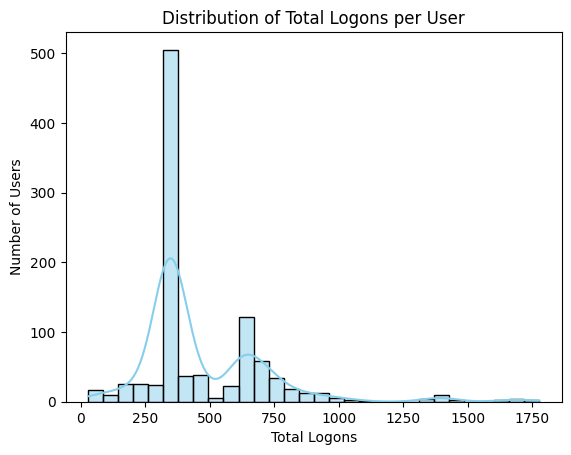

In [ ]:
sns.histplot(user_summary['total_logons'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Total Logons per User")
plt.xlabel("Total Logons")
plt.ylabel("Number of Users")

Text(0.5, 1.0, 'Suspicious Behavior Flags per User')

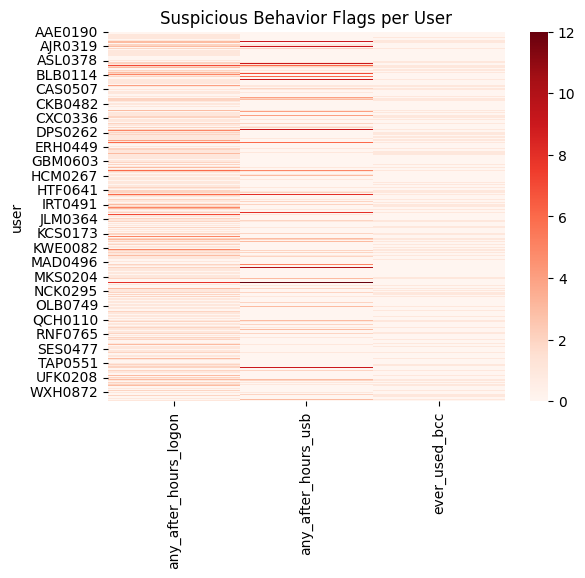

In [ ]:
flag_cols = ['any_after_hours_logon', 'any_after_hours_usb', 'ever_used_bcc']
sns.heatmap(user_summary.set_index('user')[flag_cols].astype(int), cmap='Reds', cbar=True)
plt.title("Suspicious Behavior Flags per User")


<ipython-input-146-82d7d6fecce7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_risky, x='risk_score', y='user', palette='Reds_r')


Text(0.5, 1.0, 'Top 20 Users by Risk Score')

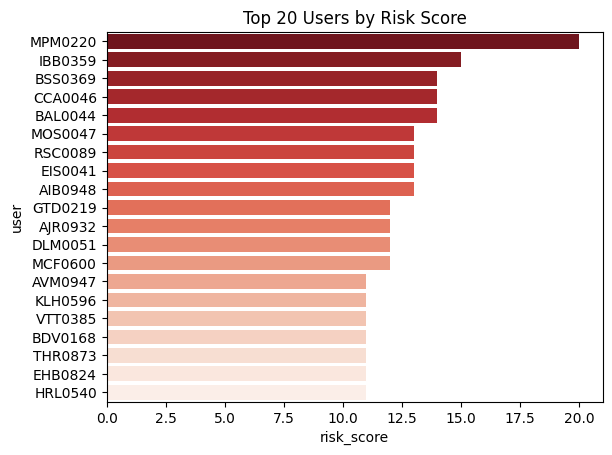

In [ ]:
user_summary['risk_score'] = (
    user_summary['any_after_hours_logon'] +
    user_summary['any_after_hours_usb'] +
    user_summary['ever_used_bcc'])

top_risky = user_summary.sort_values('risk_score', ascending=False).head(20)
sns.barplot(data=top_risky, x='risk_score', y='user', palette='Reds_r')
plt.title("Top 20 Users by Risk Score")


seq of activities of user per day

In [ ]:
grouped = pd.read_csv('/content/grouped_final_recent.csv')

In [ ]:
grouped = grouped.drop(columns = {'Unnamed: 0'})

codes represent following

Define activity encoding rules for working hours

activity_codes

    # Logging onto PC
    'logon': 1,
    # Logging off from PC
    'logoff': 2,
    # Connecting a USB drive
    'device_connect': 3,
    # Disconnecting a USB drive
    'device_disconnect': 4,
    # Opening a .doc file
    'file_access_doc': 5,
    # Opening a .exe file
    'file_access_exe': 6,
    # Opening a .jpg file
    'file_access_jpg': 7,
    # Opening a .pdf file
    'file_access_pdf': 8,
    # Opening a .text file
    'file_access_text': 9,
    # Opening a .zip file
    'file_access_zip': 10,
    # Sending an email to an internal address
    'email_send_internal': 11,
    # Sending an email to an external address
    'email_send_external': 12,

In [ ]:
grouped

,user,date_only,activity_sequence,aggregated_sequence,padded_sequence
0,AAE0190,2010-01-04,"[1, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 2 0 0 0 0 0 0 0 0 0 ...
1,AAE0190,2010-01-05,"[1, 11, 12, 12, 11, 12, 11, 12, 11, 12, 12, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 11 12 11 12 11 12 2 0 0 0 ...
2,AAE0190,2010-01-06,"[1, 12, 11, 11, 11, 11, 12, 12, 12, 12, 12, 11...","[1, 12, 11, 12, 11, 2]",[ 1 12 11 12 11 2 0 0 0 0 0 0 0 0 0 ...
3,AAE0190,2010-01-07,"[1, 11, 12, 12, 11, 12, 12, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
4,AAE0190,2010-01-08,"[1, 11, 12, 11, 12, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
...,...,...,...,...,...
330447,ZSL0305,2011-05-10,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330448,ZSL0305,2011-05-11,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330449,ZSL0305,2011-05-12,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330450,ZSL0305,2011-05-13,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [ ]:
print("\nMissing Values in Feature Dataset:")
print(final_features.isnull().sum())
print("\nMissing Values in Sequence Dataset:")
print(grouped.isnull().sum())


Missing Values in Feature Dataset:
user                       0
date_only                  0
after_hours_logon_count    0
weekend_logon_flag         0
peer_machine_logon_flag    0
total_logon_count          0
unique_pcs                 0
device_connects            0
after_hours_connects       0
device_pc_count            0
files_accessed             0
image_files_accessed       0
binary_files_accessed      0
text_files_accessed        0
file_type_entropy          0
sensitive_keyword_count    0
avg_content_word_count     0
emails_sent                0
total_recipients           0
external_ratio             0
keyword_richness           0
bcc_flag                   0
dtype: int64

Missing Values in Sequence Dataset:
user                   0
date_only              0
activity_sequence      0
aggregated_sequence    0
padded_sequence        0
dtype: int64


In [ ]:
feature_pairs = final_features[['user', 'date_only']].drop_duplicates()
seq_pairs = grouped[['user', 'date_only']].drop_duplicates()

print(f"\nUnique (user, date_only) pairs in Features: {len(feature_pairs)}")
print(f"Unique (user, date_only) pairs in Sequences: {len(seq_pairs)}")


Unique (user, date_only) pairs in Features: 330285
Unique (user, date_only) pairs in Sequences: 330452


In [ ]:
all_users = pd.unique(pd.concat([final_features['user'], grouped['user']]))
all_dates = pd.unique(pd.concat([final_features['date_only'], grouped['date_only']]))

missing_in_features = set(zip(grouped['user'], grouped['date_only'])) - set(zip(final_features['user'], final_features['date_only']))
missing_in_sequences = set(zip(final_features['user'], final_features['date_only'])) - set(zip(grouped['user'], grouped['date_only']))

print(f"\n(user, date_only) pairs in Sequences but not in Features: {len(missing_in_features)}")
print(f"(user, date_only) pairs in Features but not in Sequences: {len(missing_in_sequences)}")
if missing_in_features:
    print("Examples of missing in Features:", list(missing_in_features)[:5])
if missing_in_sequences:
    print("Examples of missing in Sequences:", list(missing_in_sequences)[:5])


(user, date_only) pairs in Sequences but not in Features: 167
(user, date_only) pairs in Features but not in Sequences: 0
Examples of missing in Features: [('PNH0761', datetime.date(2011, 5, 14)), ('PNH0761', datetime.date(2011, 2, 26)), ('WDV0573', datetime.date(2010, 2, 6)), ('WDO0870', datetime.date(2010, 2, 20)), ('DMK0257', datetime.date(2010, 4, 17))]


In [ ]:
final_features['date_only'] = pd.to_datetime(final_features['date_only'], errors='coerce').dt.date
grouped['date_only'] = pd.to_datetime(grouped['date_only'], errors='coerce').dt.date

In [ ]:
final_features['user'] = final_features['user'].astype(str)
grouped['user'] = grouped['user'].astype(str)

In [ ]:
# Convert to DataFrame for inspection
a = pd.DataFrame(missing_in_features, columns=['user', 'date_only']).head()

In [ ]:
a

,user,date_only
0,PNH0761,2011-05-14
1,PNH0761,2011-02-26
2,WDV0573,2010-02-06
3,WDO0870,2010-02-20
4,DMK0257,2010-04-17


In [ ]:
users = grouped['user'].unique()

In [ ]:
users.shape

(1000,)

In [ ]:
m = a['user'].values

In [ ]:
m

array(['PNH0761', 'PNH0761', 'WDV0573', 'WDO0870', 'DMK0257'],
      dtype=object)

In [ ]:
for i in m:
  if i in users:
    print(i)

PNH0761
PNH0761
WDV0573
WDO0870
DMK0257


In [ ]:
# See how many days user AAE0190 has in both
seq_dates = set(grouped[grouped['user'] == 'AAE0190']['date_only'])
feat_dates = set(final_features[final_features['user'] == 'AAE0190']['date_only'])

print("In sequences only:", seq_dates - feat_dates)
print("In features only:", feat_dates - seq_dates)

In sequences only: set()
In features only: set()


In [ ]:
missing_df = pd.DataFrame(list(missing_in_features), columns=['user', 'date_only'])
missing_df['date_only'] = pd.to_datetime(missing_df['date_only']).dt.date

# Count how many times each user is in missing set
missing_summary = missing_df['user'].value_counts().reset_index()
missing_summary.columns = ['user', 'missing_days']

print(missing_summary.head(10))

      user  missing_days
0  AJH0175             7
1  RHO0732             5
2  DMK0257             4
3  EHB0420             4
4  WDO0870             4
5  RTO0313             4
6  CFM0767             4
7  RSC0089             4
8  SPA0141             4
9  WKD0013             4


In [ ]:
# Filter out mismatched rows from sequences
sequence_df_filtered = grouped.merge(missing_df, on=['user', 'date_only'], how='left', indicator=True)
sequence_df_filtered = sequence_df_filtered[sequence_df_filtered['_merge'] == 'left_only'].drop(columns=['_merge'])


In [ ]:
sequence_df_filtered

,user,date_only,activity_sequence,aggregated_sequence,padded_sequence
0,AAE0190,2010-01-04,"[1, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 2 0 0 0 0 0 0 0 0 0 ...
1,AAE0190,2010-01-05,"[1, 11, 12, 12, 11, 12, 11, 12, 11, 12, 12, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 11 12 11 12 11 12 2 0 0 0 ...
2,AAE0190,2010-01-06,"[1, 12, 11, 11, 11, 11, 12, 12, 12, 12, 12, 11...","[1, 12, 11, 12, 11, 2]",[ 1 12 11 12 11 2 0 0 0 0 0 0 0 0 0 ...
3,AAE0190,2010-01-07,"[1, 11, 12, 12, 11, 12, 12, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
4,AAE0190,2010-01-08,"[1, 11, 12, 11, 12, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
...,...,...,...,...,...
330447,ZSL0305,2011-05-10,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330448,ZSL0305,2011-05-11,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330449,ZSL0305,2011-05-12,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330450,ZSL0305,2011-05-13,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [ ]:
sequence_df_filtered.to_csv('filtered_seq_features.csv')

In [ ]:
files.download('filtered_seq_features.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sequence_df_filtered

,user,date_only,activity_sequence,aggregated_sequence,padded_sequence
0,AAE0190,2010-01-04,"[1, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 2 0 0 0 0 0 0 0 0 0 ...
1,AAE0190,2010-01-05,"[1, 11, 12, 12, 11, 12, 11, 12, 11, 12, 12, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 11 12 11 12 11 12 2 0 0 0 ...
2,AAE0190,2010-01-06,"[1, 12, 11, 11, 11, 11, 12, 12, 12, 12, 12, 11...","[1, 12, 11, 12, 11, 2]",[ 1 12 11 12 11 2 0 0 0 0 0 0 0 0 0 ...
3,AAE0190,2010-01-07,"[1, 11, 12, 12, 11, 12, 12, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
4,AAE0190,2010-01-08,"[1, 11, 12, 11, 12, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
...,...,...,...,...,...
330447,ZSL0305,2011-05-10,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330448,ZSL0305,2011-05-11,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330449,ZSL0305,2011-05-12,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330450,ZSL0305,2011-05-13,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [ ]:
sequence_df_filtered = sequence_df_filtered[['user','date_only','aggregated_sequence']]

In [ ]:
final_features

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,device_pc_count,...,binary_files_accessed,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag
0,AAE0190,2010-01-04,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,43.0,0.214286,470.0,0.0
1,AAE0190,2010-01-05,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,39.0,0.538462,467.0,0.0
2,AAE0190,2010-01-06,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,40.0,0.642857,741.0,0.0
3,AAE0190,2010-01-07,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,42.0,0.571429,454.0,0.0
4,AAE0190,2010-01-08,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,13.0,40.0,0.307692,373.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,ZSL0305,2011-05-10,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,41.0,0.0
330281,ZSL0305,2011-05-11,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.000000,49.0,0.0
330282,ZSL0305,2011-05-12,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.000000,48.0,0.0
330283,ZSL0305,2011-05-13,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,30.0,0.0


In [ ]:
merged_df = pd.merge(final_features, sequence_df_filtered, on=['user', 'date_only'], how='outer').fillna(0)

In [ ]:
merged_df

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,device_pc_count,...,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag,aggregated_sequence
0,AAE0190,2010-01-04,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,43.0,0.214286,470.0,0.0,"[1, 11, 12, 11, 12, 2]"
1,AAE0190,2010-01-05,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,39.0,0.538462,467.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]"
2,AAE0190,2010-01-06,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,40.0,0.642857,741.0,0.0,"[1, 12, 11, 12, 11, 2]"
3,AAE0190,2010-01-07,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,42.0,0.571429,454.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
4,AAE0190,2010-01-08,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,40.0,0.307692,373.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,ZSL0305,2011-05-10,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,41.0,0.0,"[1, 2]"
330281,ZSL0305,2011-05-11,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,2.000000,49.0,0.0,"[1, 2]"
330282,ZSL0305,2011-05-12,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,3.000000,48.0,0.0,"[1, 2]"
330283,ZSL0305,2011-05-13,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,30.0,0.0,"[1, 2]"


In [ ]:
merged_df = merged_df.sort_values(['user', 'date_only'])

In [ ]:
merged_df.columns

Index(['user', 'date_only', 'after_hours_logon_count', 'weekend_logon_flag',
       'peer_machine_logon_flag', 'total_logon_count', 'unique_pcs',
       'device_connects', 'after_hours_connects', 'device_pc_count',
       'files_accessed', 'image_files_accessed', 'binary_files_accessed',
       'text_files_accessed', 'file_type_entropy', 'sensitive_keyword_count',
       'avg_content_word_count', 'emails_sent', 'total_recipients',
       'external_ratio', 'keyword_richness', 'bcc_flag',
       'aggregated_sequence'],
      dtype='object')

In [ ]:
numerical_cols = ['after_hours_logon_count', 'weekend_logon_flag', 'peer_machine_logon_flag',
                  'total_logon_count', 'unique_pcs', 'device_connects', 'after_hours_connects',
                  'device_pc_count', 'files_accessed', 'image_files_accessed', 'binary_files_accessed',
                  'text_files_accessed', 'file_type_entropy', 'sensitive_keyword_count',
                  'avg_content_word_count', 'emails_sent', 'total_recipients', 'external_ratio',
                  'keyword_richness', 'bcc_flag']

In [ ]:
len(numerical_cols)

20

In [ ]:
merged_df['aggregated_sequence'] = merged_df['aggregated_sequence'].apply(eval)  # Convert string to list
sequences = [seq for seq in merged_df['aggregated_sequence']]

In [ ]:
merged_df

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,device_pc_count,...,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag,aggregated_sequence
0,AAE0190,2010-01-04,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,43.0,0.214286,470.0,0.0,"[1, 11, 12, 11, 12, 2]"
1,AAE0190,2010-01-05,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,39.0,0.538462,467.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]"
2,AAE0190,2010-01-06,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,40.0,0.642857,741.0,0.0,"[1, 12, 11, 12, 11, 2]"
3,AAE0190,2010-01-07,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,42.0,0.571429,454.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
4,AAE0190,2010-01-08,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,40.0,0.307692,373.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,ZSL0305,2011-05-10,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,41.0,0.0,"[1, 2]"
330281,ZSL0305,2011-05-11,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,2.000000,49.0,0.0,"[1, 2]"
330282,ZSL0305,2011-05-12,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,3.000000,48.0,0.0,"[1, 2]"
330283,ZSL0305,2011-05-13,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,30.0,0.0,"[1, 2]"


In [ ]:
merged_df.to_csv('merged_df.csv')

In [ ]:
files.download('merged_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
uniq = []
for i in sequences:
  for j in i:
    if j not in uniq:
      uniq.append(j)

In [ ]:
uniq

[1, 11, 12, 2, 3, 5, 8, 7, 0, 10, 6]

In [ ]:
merged_df = pd.read_csv('/content/merged_df.csv')

In [ ]:
user_groups = merged_df.groupby('user')
max_timesteps = 501
n_users = len(user_groups)

In [ ]:
merged_df

,Unnamed: 0,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,...,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag,aggregated_sequence
0,0,AAE0190,2010-01-04,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,43.0,0.214286,470.0,0.0,"[1, 11, 12, 11, 12, 2]"
1,1,AAE0190,2010-01-05,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,39.0,0.538462,467.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]"
2,2,AAE0190,2010-01-06,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,40.0,0.642857,741.0,0.0,"[1, 12, 11, 12, 11, 2]"
3,3,AAE0190,2010-01-07,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,42.0,0.571429,454.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
4,4,AAE0190,2010-01-08,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13.0,40.0,0.307692,373.0,0.0,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,330280,ZSL0305,2011-05-10,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.000000,41.0,0.0,"[1, 2]"
330281,330281,ZSL0305,2011-05-11,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,2.000000,49.0,0.0,"[1, 2]"
330282,330282,ZSL0305,2011-05-12,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,3.000000,48.0,0.0,"[1, 2]"
330283,330283,ZSL0305,2011-05-13,0.0,0,0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,30.0,0.0,"[1, 2]"


In [ ]:
max_timesteps

501

In [ ]:
n_users

1000

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features = merged_df[numerical_cols].values

In [ ]:
features.shape

(330285, 20)

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
features_scaled = scaler.fit_transform(features)

In [ ]:
all_days = pd.read_csv('/content/unique_days.csv')

In [ ]:
all_days

,Unnamed: 0,day
0,0,2010-01-04
1,1,2010-01-05
2,2,2010-01-06
3,3,2010-01-07
4,4,2010-01-08
...,...,...
496,496,2011-05-15
497,497,2010-06-05
498,498,2010-12-26
499,499,2011-01-09


In [ ]:
all_days.drop(columns = {'Unnamed: 0'}, inplace = True)

In [ ]:
day_to_idx = {day: idx for idx, day in enumerate(all_days['day'])}

In [ ]:
day_to_idx

{'2010-01-04': 0,
 '2010-01-05': 1,
 '2010-01-06': 2,
 '2010-01-07': 3,
 '2010-01-08': 4,
 '2010-01-11': 5,
 '2010-01-12': 6,
 '2010-01-13': 7,
 '2010-01-14': 8,
 '2010-01-15': 9,
 '2010-01-18': 10,
 '2010-01-19': 11,
 '2010-01-20': 12,
 '2010-01-21': 13,
 '2010-01-22': 14,
 '2010-01-25': 15,
 '2010-01-26': 16,
 '2010-01-27': 17,
 '2010-01-28': 18,
 '2010-01-29': 19,
 '2010-02-01': 20,
 '2010-02-02': 21,
 '2010-02-03': 22,
 '2010-02-04': 23,
 '2010-02-05': 24,
 '2010-02-08': 25,
 '2010-02-09': 26,
 '2010-02-10': 27,
 '2010-02-11': 28,
 '2010-02-12': 29,
 '2010-02-15': 30,
 '2010-02-16': 31,
 '2010-02-17': 32,
 '2010-02-18': 33,
 '2010-02-19': 34,
 '2010-02-22': 35,
 '2010-02-23': 36,
 '2010-02-24': 37,
 '2010-02-25': 38,
 '2010-02-26': 39,
 '2010-03-01': 40,
 '2010-03-02': 41,
 '2010-03-03': 42,
 '2010-03-04': 43,
 '2010-03-05': 44,
 '2010-03-08': 45,
 '2010-03-09': 46,
 '2010-03-10': 47,
 '2010-03-11': 48,
 '2010-03-12': 49,
 '2010-03-15': 50,
 '2010-03-16': 51,
 '2010-03-17': 52,
 '2

In [ ]:
print(day_to_idx.keys())

dict_keys(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15', '2010-01-18', '2010-01-19', '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-25', '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29', '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04', '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10', '2010-02-11', '2010-02-12', '2010-02-15', '2010-02-16', '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22', '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26', '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04', '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10', '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16', '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22', '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26', '2010-03-29', '2010-03-30', '2010-03-31', '2010-04-01', '2010-04-05', '2010-04-06', '2010-04-07', '2010-04-08', '2010-04-09', '2010-04-12', '2010-04-

In [ ]:
input_dim = len(numerical_cols) + 1

In [ ]:
X = np.zeros((n_users, max_timesteps, input_dim))

In [ ]:
X.shape

(1000, 501, 21)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense, Masking
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
from datetime import datetime

In [ ]:
user_days

array(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
       '2010-01-14', '2010-01-15', '2010-01-18', '2010-01-19',
       '2010-01-20', '2010-01-21', '2010-01-22', '2010-01-25',
       '2010-01-26', '2010-01-27', '2010-01-28', '2010-01-29',
       '2010-02-01', '2010-02-02', '2010-02-03', '2010-02-04',
       '2010-02-05', '2010-02-08', '2010-02-09', '2010-02-10',
       '2010-02-11', '2010-02-12', '2010-02-15', '2010-02-16',
       '2010-02-17', '2010-02-18', '2010-02-19', '2010-02-22',
       '2010-02-23', '2010-02-24', '2010-02-25', '2010-02-26',
       '2010-03-01', '2010-03-02', '2010-03-03', '2010-03-04',
       '2010-03-05', '2010-03-08', '2010-03-09', '2010-03-10',
       '2010-03-11', '2010-03-12', '2010-03-15', '2010-03-16',
       '2010-03-17', '2010-03-18', '2010-03-19', '2010-03-22',
       '2010-03-23', '2010-03-24', '2010-03-25', '2010-03-26',
       '2010-03-29', '2010-03-30', '2010-03-31', '2010-

In [ ]:
for i, (user, group) in enumerate(user_groups):
    user_days = group['date_only'].values

    user_features = features_scaled[group.index]
    user_seq = pad_sequences([sequences[group.index[0]]], maxlen=max_timesteps, padding='post', value=0)[0]

    full_sequence = np.zeros((len(all_days), input_dim))
    for j, day in enumerate(user_days):
      if isinstance(day, str):
            day = datetime.strptime(day, '%Y-%m-%d').date()

      day_str = day.strftime('%Y-%m-%d')
      if day_str in day_to_idx:
            idx = day_to_idx[day_str]
            full_sequence[idx, :-1] = user_features[j, :]
            full_sequence[idx, -1] = user_seq[j] if j < len(user_seq) else 0

    # Truncate or pad to max_timesteps
    X[i] = pad_sequences([full_sequence], maxlen=max_timesteps, padding='post', dtype='float32', value=0.0)[0]

In [ ]:
X.shape

(1000, 501, 21)

In [ ]:
X[20]

array([[-0.75      , -1.        , -1.        , ..., -0.84012705,
        -1.        ,  1.        ],
       [-0.75      , -1.        , -1.        , ..., -0.86341977,
        -1.        , 11.        ],
       [-0.75      , -1.        , -1.        , ..., -0.83165693,
        -1.        ,  2.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
group

,user,date_only,after_hours_logon_count,weekend_logon_flag,peer_machine_logon_flag,total_logon_count,unique_pcs,device_connects,after_hours_connects,device_pc_count,...,text_files_accessed,file_type_entropy,sensitive_keyword_count,avg_content_word_count,emails_sent,total_recipients,external_ratio,keyword_richness,bcc_flag,aggregated_sequence
329939,ZSL0305,2010-01-04,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,1.0,54.0,0.0,"[1, 12, 2]"
329940,ZSL0305,2010-01-05,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,1.0,50.0,0.0,"[1, 12, 2]"
329941,ZSL0305,2010-01-06,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,5.0,0.0,56.0,0.0,"[1, 11, 2]"
329942,ZSL0305,2010-01-07,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,65.0,0.0,"[1, 12, 2]"
329943,ZSL0305,2010-01-08,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[1, 2]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330280,ZSL0305,2011-05-10,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,41.0,0.0,"[1, 2]"
330281,ZSL0305,2011-05-11,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,2.0,49.0,0.0,"[1, 2]"
330282,ZSL0305,2011-05-12,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,6.0,3.0,48.0,0.0,"[1, 2]"
330283,ZSL0305,2011-05-13,0.0,0,0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,1.0,30.0,0.0,"[1, 2]"


In [ ]:
#save X
np.save('X_scaled_seq.npy', X)

In [ ]:
from google.colab import files

In [ ]:
#save X to system
files.download('X_scaled_seq.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

better idea - keep manual features and the activity codes partseparately

In [ ]:
sequence_df_filtered = pd.read_csv('/content/filtered_seq_features.csv')
final_features = pd.read_csv('/content/final_features_extracted.csv')

In [ ]:
sequence_df_filtered

,Unnamed: 0,user,date_only,activity_sequence,aggregated_sequence,padded_sequence
0,0,AAE0190,2010-01-04,"[1, 11, 11, 11, 11, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 2 0 0 0 0 0 0 0 0 0 ...
1,1,AAE0190,2010-01-05,"[1, 11, 12, 12, 11, 12, 11, 12, 11, 12, 12, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]",[ 1 11 12 11 12 11 12 11 12 11 12 2 0 0 0 ...
2,2,AAE0190,2010-01-06,"[1, 12, 11, 11, 11, 11, 12, 12, 12, 12, 12, 11...","[1, 12, 11, 12, 11, 2]",[ 1 12 11 12 11 2 0 0 0 0 0 0 0 0 0 ...
3,3,AAE0190,2010-01-07,"[1, 11, 12, 12, 11, 12, 12, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
4,4,AAE0190,2010-01-08,"[1, 11, 12, 11, 12, 11, 11, 11, 12, 11, 11, 11...","[1, 11, 12, 11, 12, 11, 12, 11, 2]",[ 1 11 12 11 12 11 12 11 2 0 0 0 0 0 0 ...
...,...,...,...,...,...,...
330280,330447,ZSL0305,2011-05-10,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330281,330448,ZSL0305,2011-05-11,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330282,330449,ZSL0305,2011-05-12,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...
330283,330450,ZSL0305,2011-05-13,"[1, 2]","[1, 2]",[1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...


In [ ]:
sequence_df_filtered['aggregated_sequence']

,aggregated_sequence
0,"[1, 11, 12, 11, 12, 2]"
1,"[1, 11, 12, 11, 12, 11, 12, 11, 12, 11, 12, 2]"
2,"[1, 12, 11, 12, 11, 2]"
3,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
4,"[1, 11, 12, 11, 12, 11, 12, 11, 2]"
...,...
330280,"[1, 2]"
330281,"[1, 2]"
330282,"[1, 2]"
330283,"[1, 2]"


In [ ]:
max_inner_seq_len = max(len(seq) for seq in sequence_df_filtered['aggregated_sequence'])

In [ ]:
max_inner_seq_len

223

use TimeDistributed LSTM/1DCNN to capture patterns within each days activity code seq to ensue it doesnt get mixed up with the longer day seq

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, TimeDistributed, Masking, Concatenate
from tensorflow.keras.models import Model

In [ ]:
manual_input = Input(shape=(501, 20), name='manual_features')
sequence_input = Input(shape=(501, max_inner_seq_len, 1), name='aggregated_sequence')

In [ ]:
seq_encoded = TimeDistributed(
    LSTM(8),
    name="day_sequence_encoder"
)(sequence_input)

In [ ]:
seq_encoded

<KerasTensor shape=(None, 501, 8), dtype=float32, sparse=False, name=keras_tensor_1>

In [ ]:
merged = Concatenate(axis=-1)([seq_encoded, final_features])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
print(type(seq_encoded), seq_encoded.dtype)
print(type(final_features))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'> float32
<class 'pandas.core.frame.DataFrame'>


<KerasTensor shape=(None, 501, 8), dtype=float32, sparse=False, name=keras_tensor_1>

In [ ]:
def create_autoencoder(input_dim, timesteps, latent_dim):
    manual_input = Input(shape=(timesteps, input_dim), name='manual_features')
    seq_input = Input(shape=(timesteps, 16), name='sequence_features')  # Reduced to 16D

    merged = Concatenate(axis=-1)([manual_input, seq_input])
    x = Bidirectional(LSTM(64, return_sequences=True, kernel_regularizer='l2'))(merged)  # Reduced to 64
    x = LayerNormalization()(x)
    x = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True))(x)  # Reduced to 16
    attention = Attention()([x[0], x[0]])
    encoded = Concatenate()([x[1], x[2], attention[:, -1, :]])

    x = RepeatVector(timesteps)(encoded)
    x = Bidirectional(LSTM(latent_dim, return_sequences=True))(x)
    x = LayerNormalization()(x)

    manual_recon = TimeDistributed(Dense(input_dim))(x)
    seq_recon = TimeDistributed(Dense(16))(x)  # Match sequence embedding dim

    return Model(inputs=[manual_input, seq_input], outputs=[manual_recon, seq_recon], name='bilstm_autoencoder')